In [15]:
import os
import shutil
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
# Rename the uploaded file to kaggle.json
!mv "kaggle (1) (2).json" kaggle.json  # change this if your filename is different

# Create the Kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Move the file to the right location
!mv kaggle.json /root/.kaggle/kaggle.json

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json

# Download dataset from Kaggle
!kaggle datasets download -d tongpython/cat-and-dog

# Unzip dataset, overwrite if needed, and suppress prompts
!unzip -o -q cat-and-dog.zip

# Remove macOS metadata files if any
!find . -name '.DS_Store' -type f -delete

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
# Organize training set
os.makedirs('training_set/cats', exist_ok=True)
os.makedirs('training_set/dogs', exist_ok=True)

cat_files = os.listdir('training_set/training_set/cats')
for cat in cat_files:
    shutil.move(f'training_set/training_set/cats/{cat}', f'training_set/cats/{cat}')

dog_files = os.listdir('training_set/training_set/dogs')
for dog in dog_files:
    shutil.move(f'training_set/training_set/dogs/{dog}', f'training_set/dogs/{dog}')

# Remove empty folder
shutil.rmtree('training_set/training_set')

In [18]:
# Organize test set
os.makedirs('test_set/cats', exist_ok=True)
os.makedirs('test_set/dogs', exist_ok=True)

cat_test_files = os.listdir('test_set/test_set/cats')
for cat in cat_test_files:
    shutil.move(f'test_set/test_set/cats/{cat}', f'test_set/cats/{cat}')

dog_test_files = os.listdir('test_set/test_set/dogs')
for dog in dog_test_files:
    shutil.move(f'test_set/test_set/dogs/{dog}', f'test_set/dogs/{dog}')

shutil.rmtree('test_set/test_set')

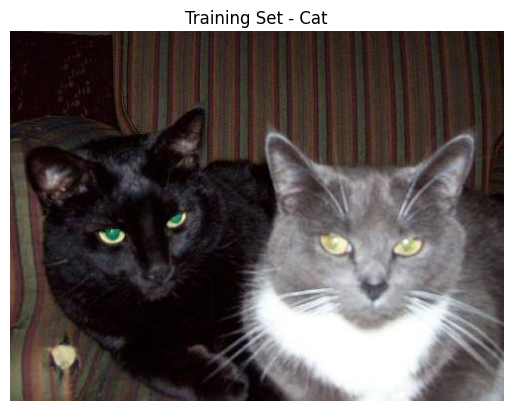

In [19]:
# Show the first image from training set (cats)
train_cat_img_path = os.path.join('training_set/cats', os.listdir('training_set/cats')[0])
img = Image.open(train_cat_img_path)
plt.imshow(img)
plt.title("Training Set - Cat")
plt.axis('off')
plt.show()

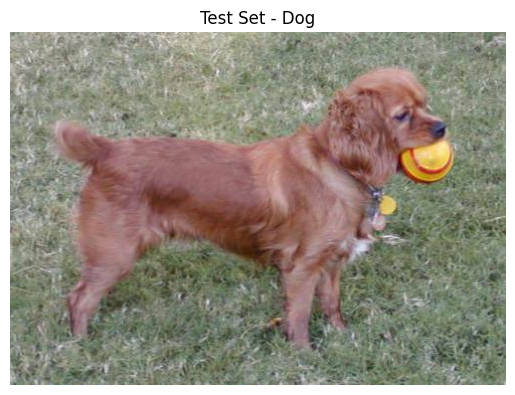

In [20]:
# Show the first image from test set (dogs)
test_dog_img_path = os.path.join('test_set/dogs', os.listdir('test_set/dogs')[0])
img = Image.open(test_dog_img_path)
plt.imshow(img)
plt.title("Test Set - Dog")
plt.axis('off')
plt.show()

# Build the CNN Architecture

## Preprocess the Images

In [21]:
# Get path to one image (e.g., a cat image)
img_path = os.path.join('training_set/cats', os.listdir('training_set/cats')[0])

# Open image and print size
img = Image.open(img_path)
print(f"Original image size: {img.size}")

Original image size: (499, 374)


In [23]:
# resize the images
batch_size = 32
target_size = (150, 150)

# rescales the pixels to be between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# scans the folders for cats and dogs in the training set, resizes the images, creates batches of 32, creates binary labels, 0 for cats and 1 for dogs
train_generator = train_datagen.flow_from_directory(
    'training_set',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = train_datagen.flow_from_directory(
    'test_set',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [24]:
# verify the labels for dogs and cats
print(train_generator.class_indices)

{'cats': 0, 'dogs': 1}


## Build the CNN Model (2